# ML Classifier Copies Integration

In [1]:
import sys
sys.path.append("../")
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, accuracy_score
from sklearn.datasets import make_blobs, make_moons

from presc.dataset import Dataset
from presc.copies.sampling import dynamical_range, grid_sampling, uniform_sampling, normal_sampling, labeling

In [12]:
def plot_comparison_synthetic_datasets(synthetic_1, synthetic_2):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True, sharey=True)

    axs[0].scatter(synthetic_1.df["x0"], synthetic_1.df["x1"], c=synthetic_1.labels)
    axs[0].set_aspect("equal")
    axs[0].set(xlabel="x0", ylabel="x1", title="Blobs classifier")

    axs[1].scatter(synthetic_2.df["x0"], synthetic_2.df["x1"], c=synthetic_2.labels)
    axs[1].set_aspect("equal")
    axs[1].set(xlabel="x0", ylabel="x1", title="Moons classifier")
    axs[1].yaxis.set_tick_params(labelbottom=True)

    plt.show()

## Original datasets
### Blobs

In [2]:
df_blobs = pd.DataFrame(np.column_stack((make_blobs(n_samples=200, centers=[(0,0), (2,1)], n_features=2, 
                                                    random_state=0))), columns=["x0", "x1", "y"])
dataset_blobs = Dataset(df_blobs, label_col="y")

(-2.5, 3.5)

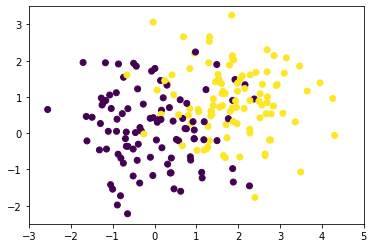

In [3]:
plt.scatter(dataset_blobs.df["x0"],dataset_blobs.df["x1"], c=dataset_blobs.labels)
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)

### Moons

In [4]:
df_moons = pd.DataFrame(np.column_stack((make_moons(n_samples=200, noise=0.2, random_state=0))), 
                        columns=["x0", "x1", "y"])
dataset_moons = Dataset(df_moons, label_col="y")

(-2.5, 3.5)

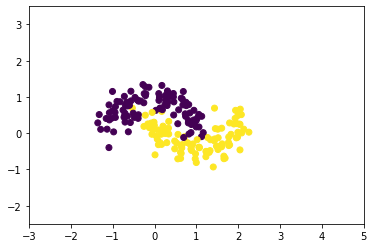

In [5]:
plt.scatter(dataset_moons.df["x0"],dataset_moons.df["x1"], c=dataset_moons.labels)
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)

## Fit classifiers
### Blobs


Score of trained SVC classifier: 0.8

Classification report: 

               precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        18
         1.0       0.85      0.77      0.81        22

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



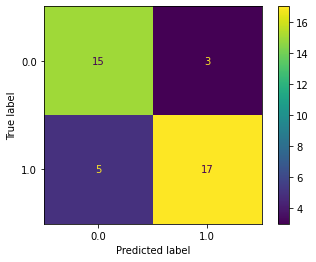

In [6]:
# Train/test split
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(dataset_blobs.features, 
                                                                            dataset_blobs.labels, test_size=0.20, 
                                                                            random_state=0)

# SVC classifier
classifier_blobs = SVC(kernel='linear', decision_function_shape='ovo')
classifier_blobs.fit(X_train_blobs, y_train_blobs)
y_predicted_blobs = classifier_blobs.predict(X_test_blobs)

score = classifier_blobs.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score}")
plot_confusion_matrix(classifier_blobs, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted_blobs))

### Moons


Score of trained SVC classifier: 0.85

Classification report: 

               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        22
         1.0       0.83      0.83      0.83        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



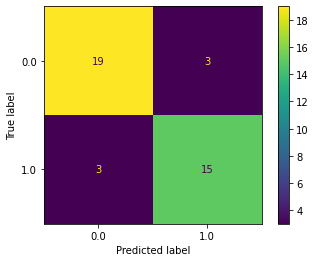

In [7]:
# Train/test split
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(dataset_moons.features, 
                                                                            dataset_moons.labels, 
                                                                            test_size=0.20, random_state=0)

# SVC classifier
classifier_moons = SVC(kernel='linear', decision_function_shape='ovo')
classifier_moons.fit(X_train_moons, y_train_moons)
y_predicted_moons = classifier_moons.predict(X_test_moons)

score = classifier_moons.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score}")
plot_confusion_matrix(classifier_moons, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted_moons))

## Feature dynamical ranges

In [9]:
print("Blobs dataset:")
blobs_range = dynamical_range(dataset_blobs.features)

Blobs dataset:
x0 min: -2.5530    x0 max: 4.3039    Interval: 6.8569   
x1 min: -2.2234    x1 max: 3.2567    Interval: 5.4801   


In [10]:
print("Moons dataset:")
moons_range = dynamical_range(dataset_moons.features)

Moons dataset:
x0 min: -1.3546    x0 max: 2.2554    Interval: 3.6100   
x1 min: -0.9321    x1 max: 1.3416    Interval: 2.2737   


## Generate distribution
###  Grid-like uniform 

We predict the labels of the generated data using the original classifiers.

In [11]:
# Blobs dataset
X_generated_gb = grid_sampling(nsamples=100, feature_parameters=blobs_range)
X_generated_gb = labeling(X_generated_gb, classifier_blobs, label_col="y")

# Moons dataset
X_generated_gm = grid_sampling(nsamples=100, feature_parameters=moons_range)
X_generated_gm = labeling(X_generated_gm, classifier_moons, label_col="y")

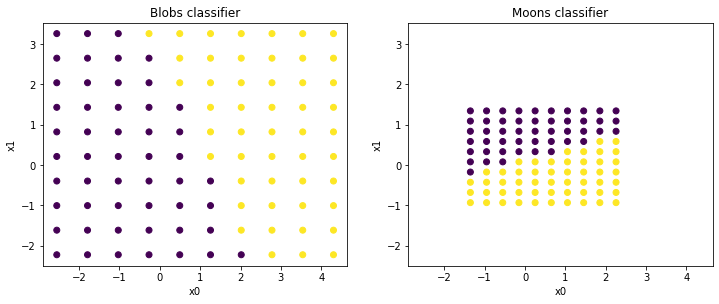

In [13]:
plot_comparison_synthetic_datasets(X_generated_gb, X_generated_gm)

### Random uniform
We generate 2 sets of uniform random data because the dynamic range of the features is different in each case.

We predict the labels of the generated data using the original classifiers.

In [14]:
# Blobs dataset
X_generated_ub = uniform_sampling(nsamples=100, feature_parameters=blobs_range)
X_generated_ub = labeling(X_generated_ub, classifier_blobs, label_col="y")

# Moons dataset
X_generated_um = uniform_sampling(nsamples=100, feature_parameters=moons_range)
X_generated_um = labeling(X_generated_um, classifier_moons, label_col="y")

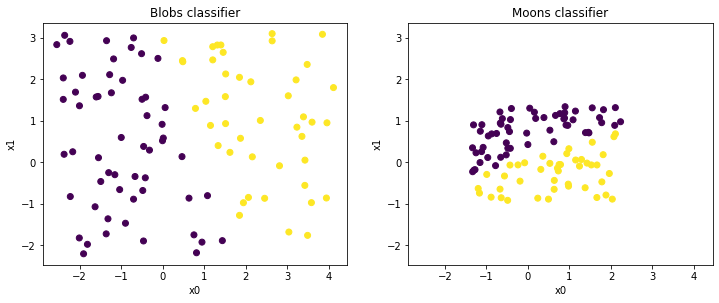

In [15]:
plot_comparison_synthetic_datasets(X_generated_ub, X_generated_um)

### Normal distribution

In [16]:
# Blobs dataset
X_generated_nb = normal_sampling(nsamples=100, label_col="y", feature_parameters=blobs_range, 
                                 feature_sigmas={"x0": 2, "x1": 2} )
X_generated_nb = labeling(X_generated_nb, classifier_blobs, label_col="y")

# Moons dataset
X_generated_nm = normal_sampling(nsamples=100, label_col="y", feature_parameters=moons_range, 
                                 feature_sigmas={"x0": 1, "x1": 1} )
X_generated_nm = labeling(X_generated_nm, classifier_moons, label_col="y")

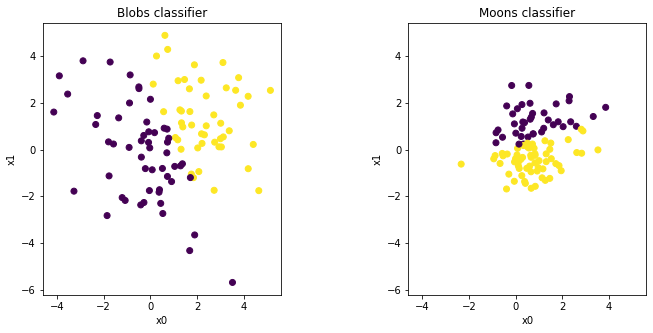

In [17]:
plot_comparison_synthetic_datasets(X_generated_nb, X_generated_nm)

----

## Copy classifier with synthetic data

### Blobs SVC classifier + grid-like synthetic data

In [18]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_gb.features, 
                                                                    X_generated_gb.labels, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_blobs)

#### Classification of synthetic data

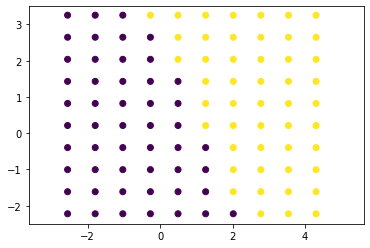

In [19]:
plt.scatter(X_generated_gb.features["x0"], X_generated_gb.features["x1"], c=X_generated_gb.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 0.95

Classification report: 

               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        10
         1.0       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



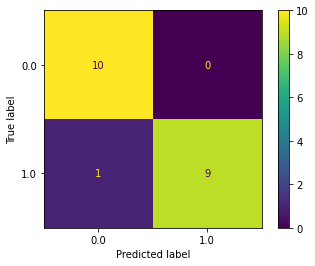

In [20]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.85

Classification report: 

               precision    recall  f1-score   support

         0.0       0.77      0.94      0.85        18
         1.0       0.94      0.77      0.85        22

    accuracy                           0.85        40
   macro avg       0.86      0.86      0.85        40
weighted avg       0.87      0.85      0.85        40



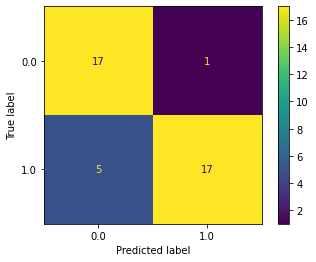

In [21]:
score_copy = classifier_copy.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted))

#### Empirical fidelity error

In [22]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_blobs, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0500
Original dataset:  0.0500


----
### Blobs SVC classifier + random uniform synthetic data

In [23]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_ub.features, 
                                                                    X_generated_ub.labels, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_blobs)

#### Classification of synthetic data

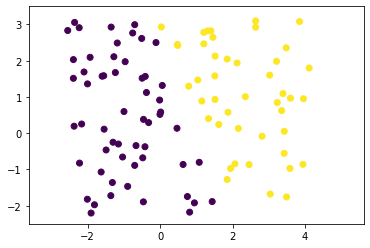

In [24]:
plt.scatter(X_generated_ub.features["x0"], X_generated_ub.features["x1"], c=X_generated_ub.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 0.95

Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



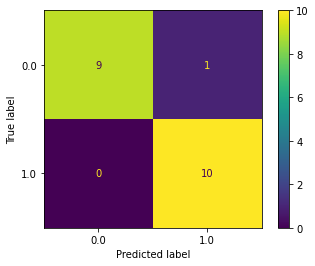

In [25]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.78

Classification report: 

               precision    recall  f1-score   support

         0.0       0.80      0.67      0.73        18
         1.0       0.76      0.86      0.81        22

    accuracy                           0.78        40
   macro avg       0.78      0.77      0.77        40
weighted avg       0.78      0.78      0.77        40



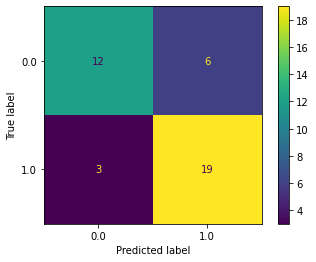

In [26]:
score_copy = classifier_copy.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted))

#### Empirical fidelity error

In [27]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_blobs, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0500
Original dataset:  0.1250


-----
### Blobs SVC classifier + normally distributed synthetic data

In [28]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_nb.features, 
                                                                    X_generated_nb.labels, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_blobs)

#### Classification of synthetic data

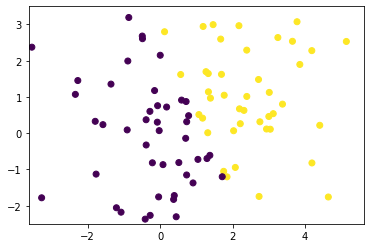

In [29]:
plt.scatter(X_generated_nb.features["x0"], X_generated_nb.features["x1"], c=X_generated_nb.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 0.90

Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      0.80      0.89        10
         1.0       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



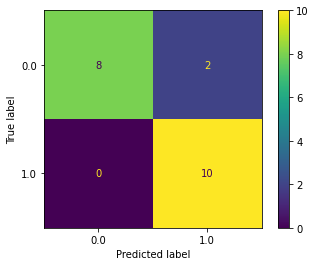

In [30]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.80

Classification report: 

               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78        18
         1.0       0.82      0.82      0.82        22

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



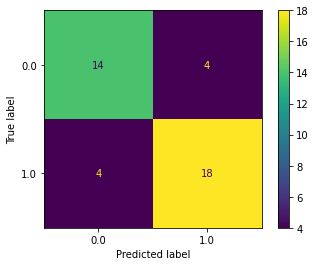

In [31]:
score_copy = classifier_copy.score(X_test_blobs, y_test_blobs)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_blobs, y_test_blobs)
print(f"\nClassification report: \n\n", classification_report(y_test_blobs, y_predicted))

#### Empirical fidelity error

In [32]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_blobs, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.1000
Original dataset:  0.0500


-----
### Moons SVC classifier + grid-like synthetic data

In [33]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_gm.features, 
                                                                    X_generated_gm.labels, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_moons)

#### Classification of synthetic data

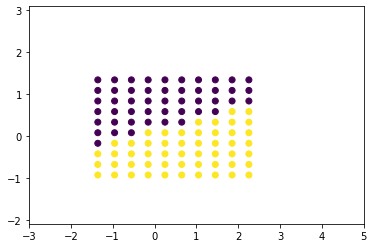

In [34]:
plt.scatter(X_generated_gm.features["x0"], X_generated_gm.features["x1"], c=X_generated_gm.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 0.90

Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        11
         1.0       0.82      1.00      0.90         9

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20



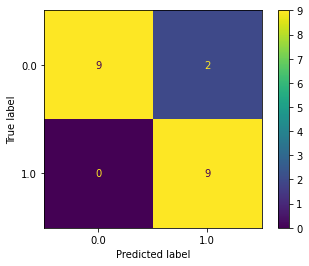

In [35]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.85

Classification report: 

               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        22
         1.0       0.83      0.83      0.83        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



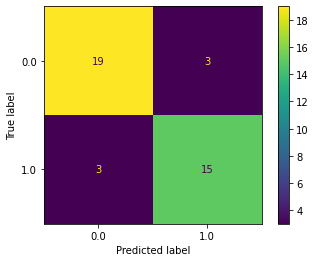

In [36]:
score_copy = classifier_copy.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted))

#### Empirical fidelity error

In [37]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_moons, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.1000
Original dataset:  0.0000


-----
### Moons SVC classifier + random uniform synthetic data

In [38]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_um.features, 
                                                                    X_generated_um.labels, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_moons)

#### Classification of synthetic data

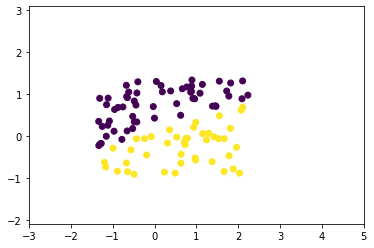

In [39]:
plt.scatter(X_generated_um.features["x0"], X_generated_um.features["x1"], c=X_generated_um.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 1.00

Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



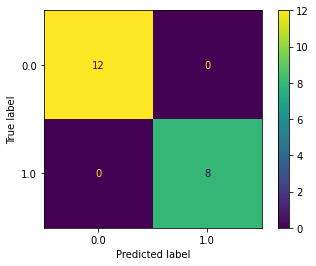

In [40]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.85

Classification report: 

               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        22
         1.0       0.83      0.83      0.83        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



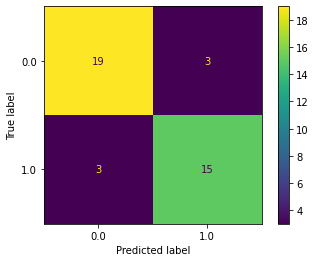

In [41]:
score_copy = classifier_copy.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted))

#### Empirical fidelity error

In [42]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_moons, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0000
Original dataset:  0.0000


-----
### Moons SVC classifier + normally distributed synthetic data

In [43]:
# Train/test split
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_generated_nm.features, 
                                                                    X_generated_nm.labels, 
                                                                    test_size=0.20, random_state=0)
# SVC classifier copy
classifier_copy = SVC(kernel='linear', decision_function_shape='ovo')
classifier_copy.fit(X_gen_train, y_gen_train)
y_gen_predicted = classifier_copy.predict(X_gen_test)
y_predicted = classifier_copy.predict(X_test_moons)

#### Classification of synthetic data

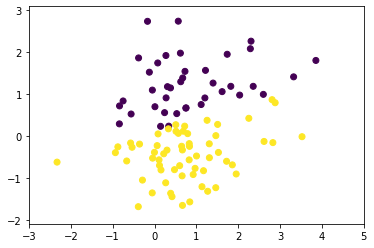

In [44]:
plt.scatter(X_generated_nm.features["x0"], X_generated_nm.features["x1"], c=X_generated_nm.labels )
plt.axis('equal')
plt.xlim(-3,5)
plt.ylim(-2.5,3.5)
plt.show()

#### Copy performance with respect to synthetic data


Score of trained SVC classifier: 1.00

Classification report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



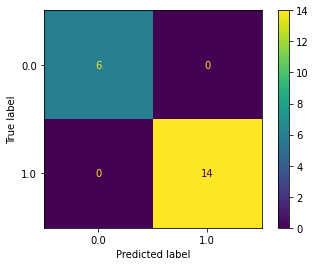

In [45]:
score_copy = classifier_copy.score(X_gen_test, y_gen_test)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_gen_test, y_gen_test)
print(f"\nClassification report: \n\n", classification_report(y_gen_test, y_gen_predicted))

#### Copy performance with respect to original data


Score of trained SVC classifier: 0.85

Classification report: 

               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        22
         1.0       0.83      0.83      0.83        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



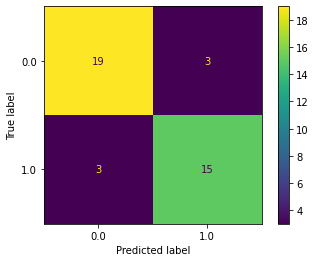

In [46]:
score_copy = classifier_copy.score(X_test_moons, y_test_moons)
print(f"\nScore of trained SVC classifier: {score_copy:.2f}")
plot_confusion_matrix(classifier_copy, X_test_moons, y_test_moons)
print(f"\nClassification report: \n\n", classification_report(y_test_moons, y_predicted))

#### Empirical fidelity error

In [47]:
# Synthetic data
error_synthetic = 1-accuracy_score(y_gen_test, y_gen_predicted)
# Original data
error_original = 1-accuracy_score(y_predicted_moons, y_predicted)

print("Empirical fidelity error")
print(f"Synthetic dataset: {error_synthetic:.4f}")
print(f"Original dataset:  {error_original:.4f}")

Empirical fidelity error
Synthetic dataset: 0.0000
Original dataset:  0.0000


--------